# Algerian forest fire dataset pe based hoga ye 11 attributes and 1 output attribute(class)
The 244 instances have been classified into fire(138 classes) and notfire(106 classes)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv',header = 0)
'''The header parameter in pd.read_csv() determines which row of the CSV file will be used as the column names (headers).

Understanding header=0:
When you set header=0, Pandas uses the first row (index 0, since indexing starts at 0) as the column headers.
This means that the actual first row (index 0) is header for the file

if u do header = 1:
This means that the actual first row (index 0) is ignored as headers and will be treated as data instead.


example :
A, B, C
Name, Age, City
John, 25, New York
Alice, 30, London
Bob, 22, Tokyo

df = pd.read_csv('data.csv', header=0)
print(df)
 output:
        A    B      C
0   Name  Age   City
1   John   25  New York
2  Alice   30   London
3    Bob   22    Tokyo


if u do:
df = pd.read_csv('data.csv', header=1)
print(df)

output:
    Name  Age      City
0   John   25  New York
1  Alice   30   London
2    Bob   22    Tokyo
means the first row is ignored

'''




"The header parameter in pd.read_csv() determines which row of the CSV file will be used as the column names (headers).\n\nUnderstanding header=0:\nWhen you set header=0, Pandas uses the first row (index 0, since indexing starts at 0) as the column headers.\nThis means that the actual first row (index 0) is header for the file\n\nif u do header = 1:\nThis means that the actual first row (index 0) is ignored as headers and will be treated as data instead.\n\n\nexample :\nA, B, C\nName, Age, City\nJohn, 25, New York\nAlice, 30, London\nBob, 22, Tokyo\n\ndf = pd.read_csv('data.csv', header=0)\nprint(df)\n output:\n        A    B      C\n0   Name  Age   City\n1   John   25  New York\n2  Alice   30   London\n3    Bob   22    Tokyo\n\n\nif u do:\ndf = pd.read_csv('data.csv', header=1)\nprint(df)\n\noutput:\n    Name  Age      City\n0   John   25  New York\n1  Alice   30   London\n2    Bob   22    Tokyo\nmeans the first row is ignored\n\n"

In [4]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# TEMPERATURE will be output attribute rest 11 are input attributes

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# Data Cleaning start kro

In [6]:
#check for missing values
dataset[dataset.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


i can see that at 122,123 and 168th row there are missing values NaN

moving on .. the dataset is converted into two sets based on region from 0 to 123 region is bejaia region


from 127 to rest it is sidi-bel abbes region

In [7]:
#0 to 123 tk region 0
#123 se aage region 1 aisa krke humne ek extra attribute de diya saare data ko

dataset.loc[:123,"Region"]=0
dataset.loc[122:,"Region"]=1
df = dataset

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [10]:
#region ko floating type se int type bna do upr pehle region 0.0 1.0 aise dikh rha tha ab direct 0 ya 1 btayega
df[['Region']] = df[['Region']].astype(int)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df.isnull().sum()
#checking if i have null values

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [13]:
#remove the null values
df = df.dropna().reset_index(drop = True)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df.isnull().sum()
#ALL NULL VALUES HAVE BEEN REMOVED

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.iloc[[122]]
#122nd row ko dekhne pe pta chala usme sahi values filled nhi hai
#day ke under day likha hai naa ki asli value of that day
#RH me Rh likha hai jbki sahi value likhi honi chahiye thi
#thats why u should remove the 122nd row

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
#remove 122nd row and reset the indexes
df = df.drop(122).reset_index(drop = True)

In [18]:
df.iloc[[122]]
#now u can see ur data is correctly displayed under 122nd row

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
df.columns
#fix spaces in those column names

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
#str.strip() removes these empty spaces
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

you can see in df.columns that the datatype is "Object" we have to change that to int

In [21]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


change remaining columns to float datatype as they are in float type jabki pehle vali sb int type me thi

In [23]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)
#classes ko object me hi rehne do kyunki vo key value pair type value store kr rhi hai

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [26]:
## finally u have cleaned the data now save it in ur csv file
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)
'''When you save a Pandas DataFrame using .to_csv(), Pandas automatically writes the row index (row numbers) to the file by default.

Setting index=False prevents Pandas from saving the index in the CSV file.'''

'When you save a Pandas DataFrame using .to_csv(), Pandas automatically writes the row index (row numbers) to the file by default.\n\nSetting index=False prevents Pandas from saving the index in the CSV file.'

# NOW DO EXPLORATORY DATA ANALYSIS

In [27]:
# drop day,month,year as they will not be useful for predicting the value of temperature
#store the remaining dataset in df_copy
# date,day, month will not be important for predicting temperature so remove them 
df_copy = df.drop(['day','month','year'],axis = 1)

In [28]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
# categories in classes
df_copy['Classes'].value_counts()
#df_copy['Classes'] selects the column 'Classes', which is a pandas Series.
 # .value_counts():
    #It counts how many times each unique value appears in the 'Classes' column.
    # It returns a new Series where:
         #The index contains the unique values.
         #The values are the count of each unique value.
         #The result is sorted in descending order by default.
#basically ye btayega ki fire ke kitne values hai aur not fire ke kitne

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [30]:
'''for some reason (may be due to spaces) not fire aur fire baar baar aa rha hai so lets 
unite all fire and not fire categories'''
# jaha pe df_copy me classes hai vaha jao agar vaha apko not fire mile to usse 0 bolo else 1
#aisa krke hum fire aur not fire ko alag alag categories me baant denge
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [31]:
df_copy.head()
#now u can see classes me fire or not fire ki jagah 0 or 1 likha milega which tells ki not fire hai ya fire hai

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [32]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [34]:
df_copy['Classes'].value_counts()
''' now u see only 2 categories are there 0 or 1'''

Classes
1    137
0    106
Name: count, dtype: int64

#### Ploting histogram for all features


In [40]:
#checking available styles for our histogram
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


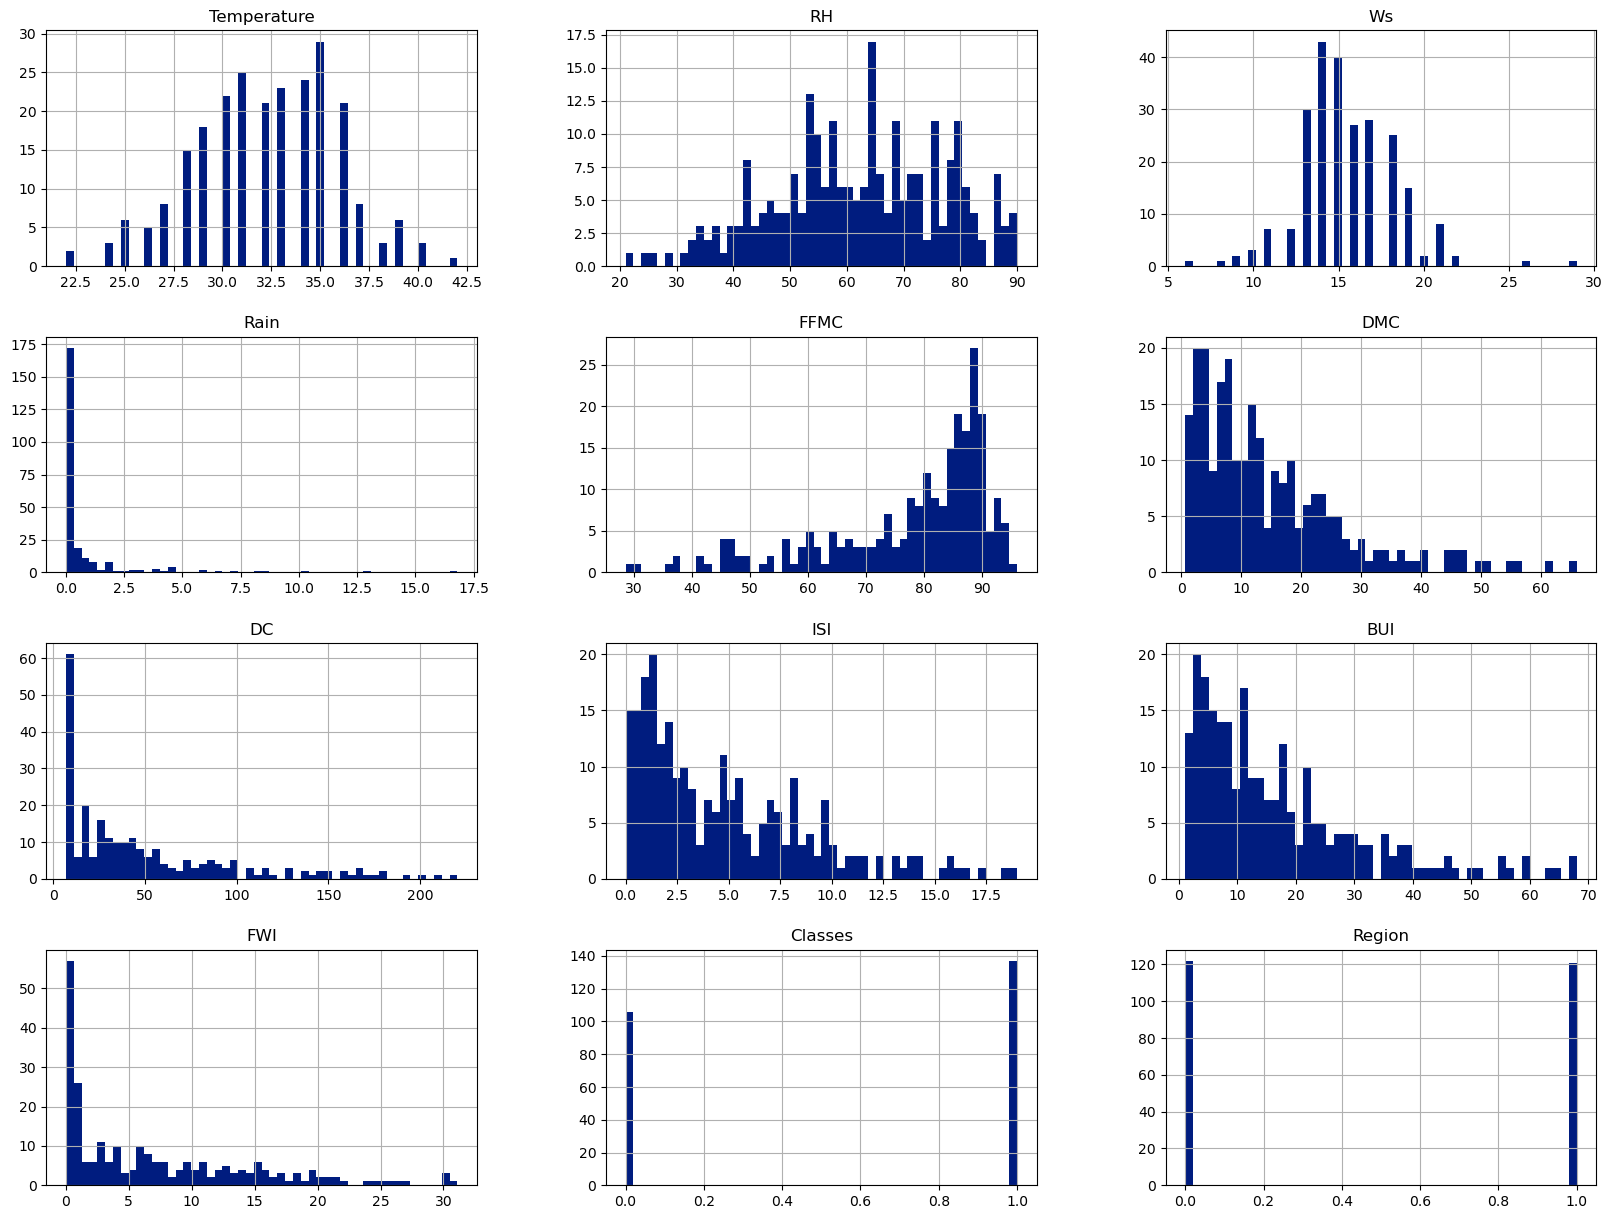

In [43]:
plt.style.use('seaborn-v0_8-dark-palette')  # Apply seaborn style
df_copy.hist(bins=50, figsize=(20, 15))  # Generate histograms
plt.show()  # Show the plot

'''bins=50

This applies to histograms and controls the number of bins (intervals) the data is grouped into.
A higher number of bins gives more granularity (detailed view), while a lower number gives a smoother distribution.'''

'''figsize=(20, 15)

This controls the size of the figure in inches.
(20, 15) means the figure will be 20 inches wide and 15 inches tall.
You can adjust these values to make the plot larger or smaller.'''


## plotting pie chart for fire vs not fire

In [44]:
#percentage for pie chart
percentage = df_copy['Classes'].value_counts(normalize = True)*100

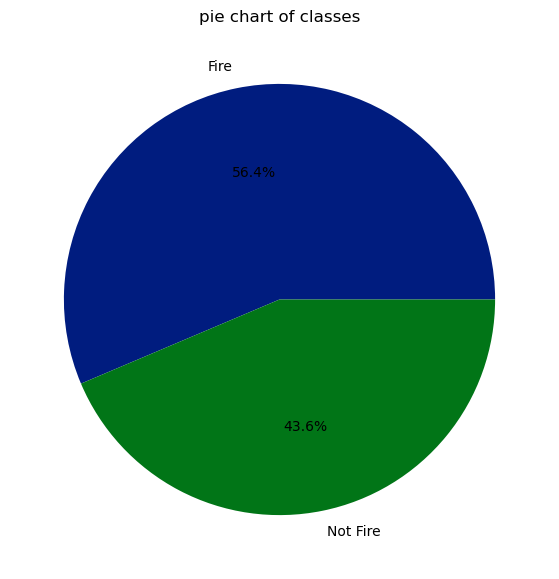

In [45]:
#plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("pie chart of classes")
plt.show()

# CORRELATION

In [46]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

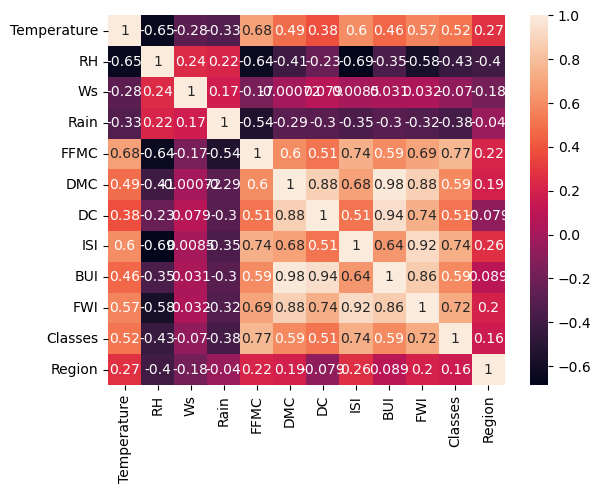

In [49]:
# u can also see correlation among different features by heatmap
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

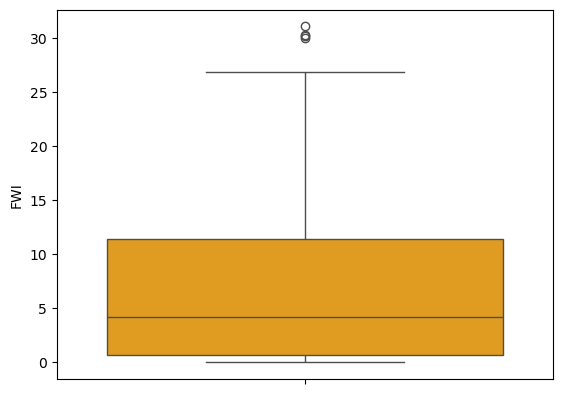

In [52]:
# u can also see box plot w.r.t any feature
sns.boxplot(df_copy['FWI'],color='orange')

Text(0.5, 1.0, 'fire Analysis of Sidi_Bel region')

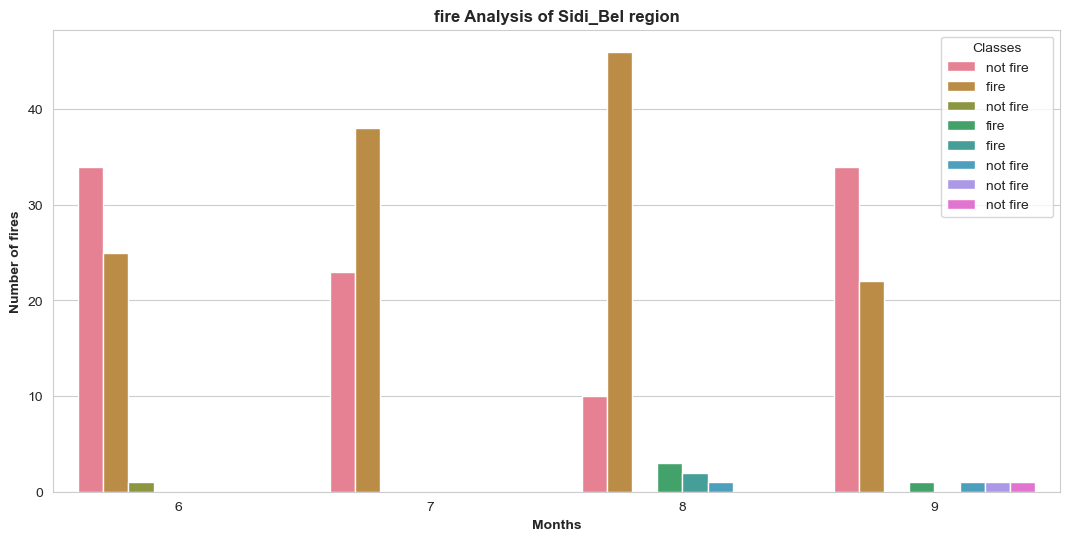

In [55]:
#lets do monthly fire analysis for region 1 i.e. sidi bel region
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("fire Analysis of Sidi_Bel region",weight='bold')



In [57]:
'''but u can see in our plot vahi fire not fire ki problem aa rhi hai multiple categories ban rhi hai fire not fire ki
jabki hume sirf 2 categories chahiye either fire or not fire'''
#this is due to having spaces
#humne df_copy me to vo issue fix kr diya tha but df me nahi kiya tha so df me bhi ye 
#issue fix kr do
'''jaha pe df me classes hai vaha jao agar vaha apko not fire mile to usse "not fire" bolo else "fire"
#aisa krke hum fire aur not fire ko alag alag categories me baant denge'''
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'fire Analysis of Sidi_Bel region')

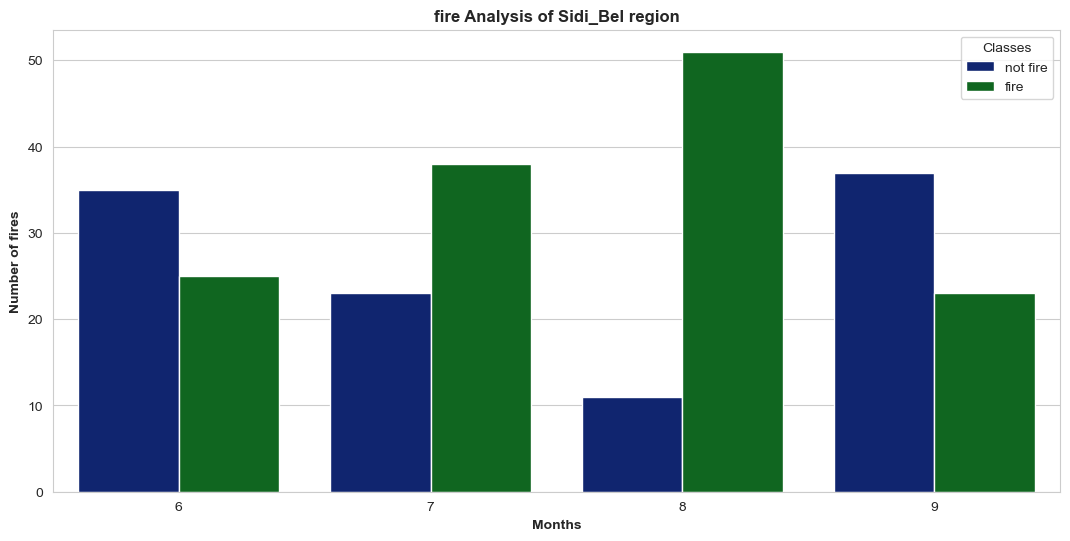

In [58]:
#now execute again the monthly fire analysis for region 1
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("fire Analysis of Sidi_Bel region",weight='bold')

Text(0.5, 1.0, 'fire analysis of Brjaia regions')

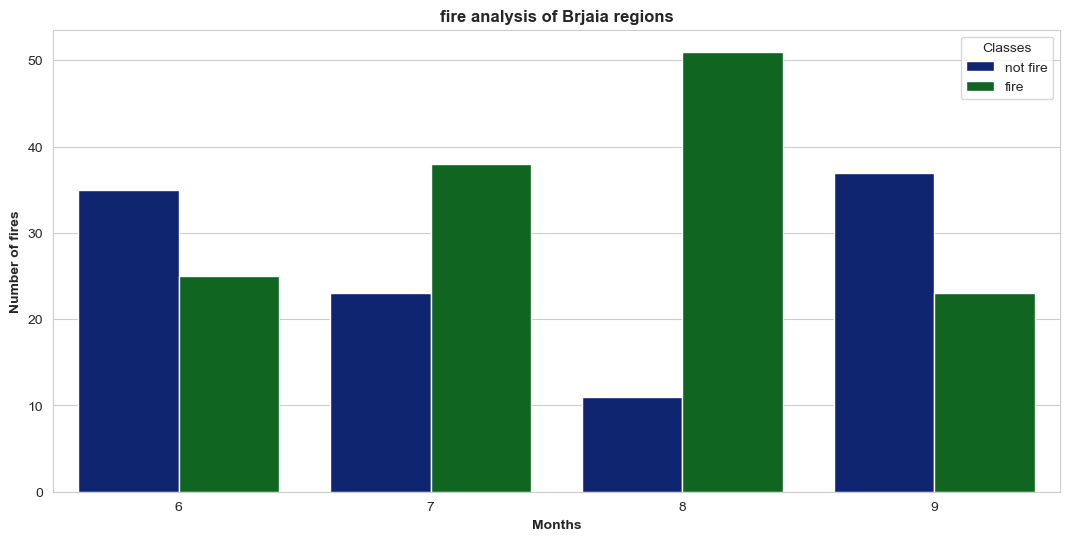

In [61]:
#similarly for region 0 i.e. Bejia region 
# the monthly fire analysis is:
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("fire analysis of Brjaia regions",weight='bold')

Its observed that august and september had the most number of forest fires for both regions
 and from the above plot of months we can understand a few things

1.Most of the fires happenend in aug and very high fires happened only 3 months-June,July,August

2.Less fires was on September

# EDA is complete now turn to Train the model 
# training of model is done in ModelTrainingALGFOR.ipynb file